In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('Credit Card Default II.csv')
df=df.drop(columns='clientid')
df.head()

,income,age,loan,default
0,66155.92510,59.017015,8106.532131,0
1,34415.15397,48.117153,6564.745018,0
2,57317.17006,63.108049,8020.953296,0
3,42709.53420,45.751972,6103.642260,0
4,66952.68885,18.584336,8770.099235,1


**Data Exploration and Cleaning**

In [2]:
df.isnull().any()

income     False
age         True
loan       False
default    False
dtype: bool

With isnull function, we find that age colume has some NULL value.<br>
By using describe function, we find that age and loan columes have some abnormal value or outliers.

In [3]:
df.describe()

,income,age,loan,default
count,2000.000000,1997.000000,2000.000000,2000.000000
mean,45331.600018,40.807559,4444.369695,0.141500
std,14326.327119,13.624469,3045.410024,0.348624
min,20014.489470,-52.423280,1.377630,0.000000
25%,32796.459720,28.990415,1939.708847,0.000000
50%,45789.117310,41.317159,3974.719418,0.000000
75%,57791.281670,52.587040,6432.410625,0.000000
max,69995.685580,63.971796,13766.051240,1.000000


In [4]:
#drop rows with null value
df=df.dropna(axis=0,how='any')

#drop rows with negative age value
df=df[df['age']>0]
df.shape

(1994, 4)

Now, explore the outlier values of loan. It can be see that all the loans below q1 value do not have default. Thus, the outliers will not affect the result.

In [5]:
q1=1940
df[(df['loan']<q1)&(df['default']==1)].shape

(0, 4)

**Data Visualization**

<AxesSubplot:>

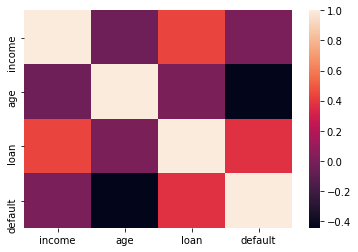

In [6]:
import seaborn as sns
sns.heatmap(df.corr())

array([[<AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'loan'}>,
        <AxesSubplot:title={'center':'default'}>]], dtype=object)

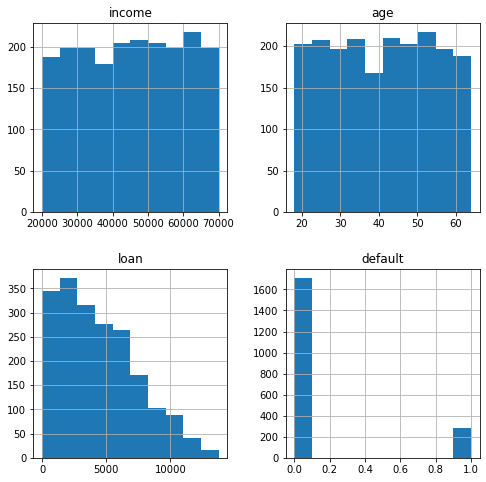

In [7]:
df.hist(figsize=(8,8))

Text(0.5, 0, 'Default')

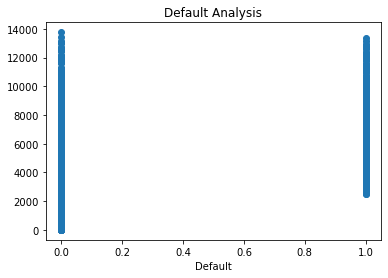

In [8]:
import matplotlib.pylab as plt
plt.scatter(df['default'],df['loan'])
plt.title('Default Analysis')
plt.xlabel('Default')

In [9]:
df['default'].value_counts()

0    1711
1     283
Name: default, dtype: int64

In [10]:
df=df[['default','age','income','loan']]
df.head()

,default,age,income,loan
0,0,59.017015,66155.92510,8106.532131
1,0,48.117153,34415.15397,6564.745018
2,0,63.108049,57317.17006,8020.953296
3,0,45.751972,42709.53420,6103.642260
4,1,18.584336,66952.68885,8770.099235


From visualization, we know that all of the default are above 2000 loan. Also, our dataset is imbalance with only a little rows of default = 1.<br>
Next, we will split our dataset, deal with the imbalanced problem and standardize the data.

In [11]:
X=df.drop(columns='default')
Y=df['default']
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=1)

In [12]:
Y_train.value_counts()

0    1283
1     212
Name: default, dtype: int64

In [13]:
#deal with imbalanced data
from imblearn.over_sampling import SMOTE
X_train,Y_train=SMOTE(random_state=1).fit_resample(X_train,Y_train)

In [14]:
#Since the variance of income and loan is high, I will use z-score to transfer these two features.
from scipy import stats
X_train['loan']=stats.zscore(X_train['loan'])
X_test['loan']=stats.zscore(X_test['loan'])

X_train['income']=stats.zscore(X_train['income'])
X_test['income']=stats.zscore(X_test['income'])

In [15]:
def prediction_result(model):
    pred_tra=model.predict(X_train)
    cm_tra=confusion_matrix(Y_train,pred_tra)
    print(cm_tra)
    print('accuracy of train is ',(cm_tra[0,0]+cm_tra[1,1])/sum(sum(cm_tra)))
    print('precision of train is ',cm_tra[1,1]/(cm_tra[0,1]+cm_tra[1,1]))
    print('recall of train is ',cm_tra[1,1]/(cm_tra[1,0]+cm_tra[1,1]))

    pred_tst=model.predict(X_test)
    cm_tst=confusion_matrix(Y_test,pred_tst)
    print(cm_tst)
    print('accuracy of test is ',(cm_tst[0,0]+cm_tst[1,1])/sum(sum(cm_tst)))
    print('precision of test is ',cm_tst[1,1]/(cm_tst[0,1]+cm_tst[1,1]))
    print('recall of test is ',cm_tst[1,1]/(cm_tst[1,0]+cm_tst[1,1]))

In [16]:
from sklearn.metrics import confusion_matrix

from sklearn import linear_model
model=linear_model.LogisticRegression(random_state=1)
model.fit(X_train,Y_train)

prediction_result(model)

[[1191   92]
 [  30 1253]]
accuracy of train is  0.9524551831644583
precision of train is  0.9315985130111524
recall of train is  0.9766173031956352
[[366  62]
 [  0  71]]
accuracy of test is  0.875751503006012
precision of test is  0.5338345864661654
recall of test is  1.0


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


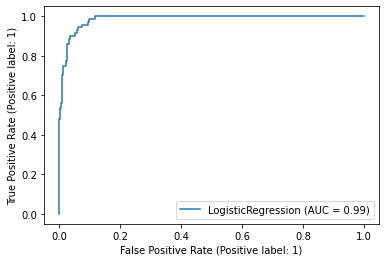

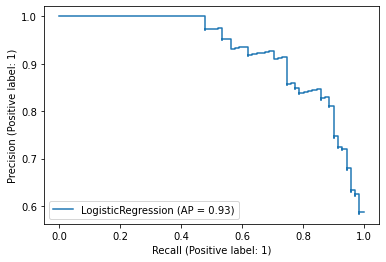

In [17]:
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_precision_recall_curve

plot_roc_curve(model,X_test,Y_test)
plot_precision_recall_curve(model,X_test,Y_test)

In [18]:
#Decision Tree
from sklearn import tree
model=tree.DecisionTreeClassifier(random_state=1)
model.fit(X_train,Y_train)

prediction_result(model)

[[1283    0]
 [   0 1283]]
accuracy of train is  1.0
precision of train is  1.0
recall of train is  1.0
[[401  27]
 [  0  71]]
accuracy of test is  0.9458917835671342
precision of test is  0.7244897959183674
recall of test is  1.0


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


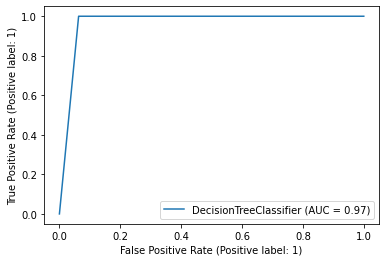

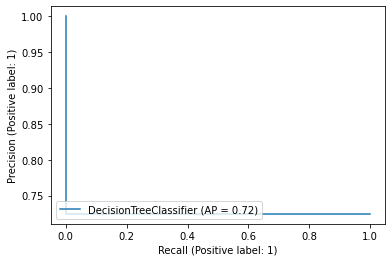

In [19]:
plot_roc_curve(model,X_test,Y_test)
plot_precision_recall_curve(model,X_test,Y_test)

In [20]:
#Random Forest
from sklearn import ensemble
model=ensemble.RandomForestClassifier(random_state=1)
model.fit(X_train,Y_train)

prediction_result(model)

[[1283    0]
 [   0 1283]]
accuracy of train is  1.0
precision of train is  1.0
recall of train is  1.0
[[399  29]
 [  0  71]]
accuracy of test is  0.9418837675350702
precision of test is  0.71
recall of test is  1.0


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


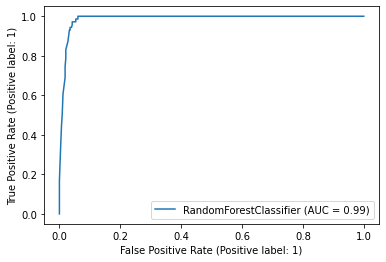

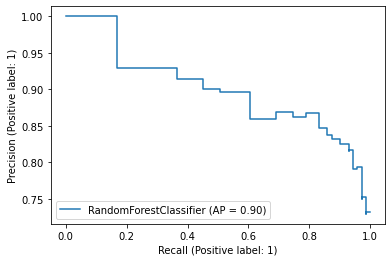

In [21]:
plot_roc_curve(model,X_test,Y_test)
plot_precision_recall_curve(model,X_test,Y_test)

In [22]:
#XGBoost
import xgboost as xgb
model = xgb.XGBClassifier(random_state=1)
model.fit(X_train,Y_train)

prediction_result(model)

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/xgboost/compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[19:26:30] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[1283    0]
 [   0 1283]]
accuracy of train is  1.0
precision of train is  1.0
recall of train is  1.0
[[403  25]
 [  0  71]]
accuracy of test is  0.9498997995991983
precision of test is  0.7395833333333334
recall of test is  1.0


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, 

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or

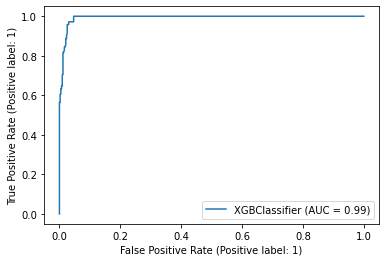

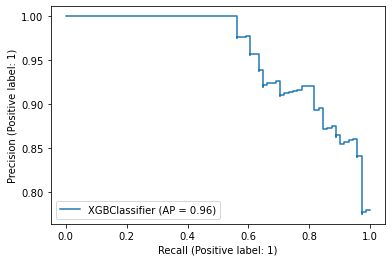

In [23]:
plot_roc_curve(model,X_test,Y_test)
plot_precision_recall_curve(model,X_test,Y_test)

In [24]:
#neural network model
from sklearn import neural_network
model=neural_network.MLPClassifier(random_state=1)
model.fit(X_train,Y_train)

prediction_result(model)

[[1219   64]
 [   8 1275]]
accuracy of train is  0.9719407638347622
precision of train is  0.9522031366691561
recall of train is  0.9937646141855028
[[381  47]
 [  0  71]]
accuracy of test is  0.905811623246493
precision of test is  0.6016949152542372
recall of test is  1.0


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


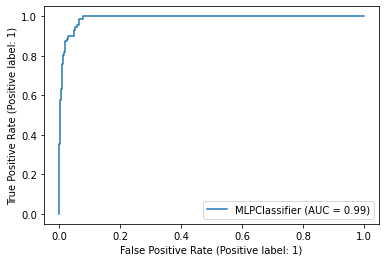

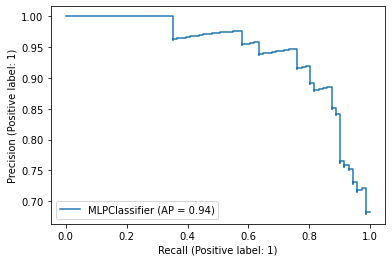

In [25]:
plot_roc_curve(model,X_test,Y_test)
plot_precision_recall_curve(model,X_test,Y_test)

**Apply Keras & tensorflow on neural network**

In [26]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [27]:
model=Sequential()
model.add(Dense(20,input_dim=3,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(20,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid"))
model.add(Dropout(0.2))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                80        
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
 dropout_2 (Dropout)         (None, 1)                 0         
                                                                 
Total params: 521
Trainable params: 521
Non-trainable pa

In [28]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

Epoch 1/500
81/81 [==============================] - 1s 1ms/step - loss: 5.1661 - accuracy: 0.5090
Epoch 2/500
81/81 [==============================] - 0s 1ms/step - loss: 4.7584 - accuracy: 0.5140
Epoch 3/500
81/81 [==============================] - 0s 952us/step - loss: 4.1417 - accuracy: 0.5097
Epoch 4/500
81/81 [==============================] - 0s 786us/step - loss: 3.9107 - accuracy: 0.5246
Epoch 5/500
81/81 [==============================] - 0s 804us/step - loss: 3.6882 - accuracy: 0.5183
Epoch 6/500
81/81 [==============================] - 0s 783us/step - loss: 3.4440 - accuracy: 0.5273
Epoch 7/500
81/81 [==============================] - 0s 827us/step - loss: 3.4571 - accuracy: 0.5242
Epoch 8/500
81/81 [==============================] - 0s 775us/step - loss: 3.3285 - accuracy: 0.5210
Epoch 9/500
81/81 [==============================] - 0s 788us/step - loss: 3.2024 - accuracy: 0.5078
Epoch 10/500
81/81 [==============================] - 0s 781us/step - loss: 3.1924 - accuracy: 

81/81 [==============================] - 0s 770us/step - loss: 2.1117 - accuracy: 0.6824
Epoch 82/500
81/81 [==============================] - 0s 760us/step - loss: 2.0203 - accuracy: 0.7019
Epoch 83/500
81/81 [==============================] - 0s 755us/step - loss: 1.9687 - accuracy: 0.7104
Epoch 84/500
81/81 [==============================] - 0s 756us/step - loss: 1.9279 - accuracy: 0.6824
Epoch 85/500
81/81 [==============================] - 0s 757us/step - loss: 1.9903 - accuracy: 0.7023
Epoch 86/500
81/81 [==============================] - 0s 750us/step - loss: 1.7414 - accuracy: 0.7241
Epoch 87/500
81/81 [==============================] - 0s 754us/step - loss: 1.9354 - accuracy: 0.7190
Epoch 88/500
81/81 [==============================] - 0s 754us/step - loss: 1.8611 - accuracy: 0.6828
Epoch 89/500
81/81 [==============================] - 0s 728us/step - loss: 2.0352 - accuracy: 0.7190
Epoch 90/500
81/81 [==============================] - 0s 727us/step - loss: 1.8948 - accuracy: 

81/81 [==============================] - 0s 899us/step - loss: 1.9402 - accuracy: 0.8161
Epoch 161/500
81/81 [==============================] - 0s 798us/step - loss: 1.6838 - accuracy: 0.8301
Epoch 162/500
81/81 [==============================] - 0s 795us/step - loss: 1.8079 - accuracy: 0.8254
Epoch 163/500
81/81 [==============================] - 0s 853us/step - loss: 1.7046 - accuracy: 0.8375
Epoch 164/500
81/81 [==============================] - 0s 841us/step - loss: 1.8946 - accuracy: 0.8281
Epoch 165/500
81/81 [==============================] - 0s 867us/step - loss: 1.6519 - accuracy: 0.8387
Epoch 166/500
81/81 [==============================] - 0s 778us/step - loss: 1.6401 - accuracy: 0.8390
Epoch 167/500
81/81 [==============================] - 0s 759us/step - loss: 1.5935 - accuracy: 0.8531
Epoch 168/500
81/81 [==============================] - 0s 763us/step - loss: 1.8011 - accuracy: 0.8313
Epoch 169/500
81/81 [==============================] - 0s 765us/step - loss: 1.6637 - a

81/81 [==============================] - 0s 719us/step - loss: 1.5997 - accuracy: 0.8644
Epoch 240/500
81/81 [==============================] - 0s 732us/step - loss: 1.5974 - accuracy: 0.8648
Epoch 241/500
81/81 [==============================] - 0s 749us/step - loss: 1.7636 - accuracy: 0.8554
Epoch 242/500
81/81 [==============================] - 0s 761us/step - loss: 1.6709 - accuracy: 0.8679
Epoch 243/500
81/81 [==============================] - 0s 770us/step - loss: 1.5704 - accuracy: 0.8741
Epoch 244/500
81/81 [==============================] - 0s 779us/step - loss: 1.6410 - accuracy: 0.8617
Epoch 245/500
81/81 [==============================] - 0s 773us/step - loss: 1.7624 - accuracy: 0.8593
Epoch 246/500
81/81 [==============================] - 0s 764us/step - loss: 1.6526 - accuracy: 0.8718
Epoch 247/500
81/81 [==============================] - 0s 745us/step - loss: 1.5426 - accuracy: 0.8741
Epoch 248/500
81/81 [==============================] - 0s 734us/step - loss: 1.6462 - a

81/81 [==============================] - 0s 849us/step - loss: 1.5384 - accuracy: 0.8874
Epoch 319/500
81/81 [==============================] - 0s 822us/step - loss: 1.5906 - accuracy: 0.8823
Epoch 320/500
81/81 [==============================] - 0s 844us/step - loss: 1.7926 - accuracy: 0.8691
Epoch 321/500
81/81 [==============================] - 0s 839us/step - loss: 1.5886 - accuracy: 0.8882
Epoch 322/500
81/81 [==============================] - 0s 831us/step - loss: 1.4822 - accuracy: 0.8928
Epoch 323/500
81/81 [==============================] - 0s 1ms/step - loss: 1.5549 - accuracy: 0.8858
Epoch 324/500
81/81 [==============================] - 0s 886us/step - loss: 1.5608 - accuracy: 0.8835
Epoch 325/500
81/81 [==============================] - 0s 840us/step - loss: 1.6493 - accuracy: 0.8807
Epoch 326/500
81/81 [==============================] - 0s 791us/step - loss: 1.4901 - accuracy: 0.8913
Epoch 327/500
81/81 [==============================] - 0s 730us/step - loss: 1.5485 - acc

81/81 [==============================] - 0s 742us/step - loss: 1.6970 - accuracy: 0.8835
Epoch 398/500
81/81 [==============================] - 0s 760us/step - loss: 1.5797 - accuracy: 0.8901
Epoch 399/500
81/81 [==============================] - 0s 746us/step - loss: 1.5273 - accuracy: 0.8920
Epoch 400/500
81/81 [==============================] - 0s 745us/step - loss: 1.5211 - accuracy: 0.8932
Epoch 401/500
81/81 [==============================] - 0s 772us/step - loss: 1.7341 - accuracy: 0.8800
Epoch 402/500
81/81 [==============================] - 0s 997us/step - loss: 1.5647 - accuracy: 0.8917
Epoch 403/500
81/81 [==============================] - 0s 768us/step - loss: 1.7331 - accuracy: 0.8772
Epoch 404/500
81/81 [==============================] - 0s 741us/step - loss: 1.6538 - accuracy: 0.8854
Epoch 405/500
81/81 [==============================] - 0s 742us/step - loss: 1.6796 - accuracy: 0.8839
Epoch 406/500
81/81 [==============================] - 0s 751us/step - loss: 1.5699 - a

81/81 [==============================] - 0s 754us/step - loss: 1.6103 - accuracy: 0.8878
Epoch 477/500
81/81 [==============================] - 0s 759us/step - loss: 1.5544 - accuracy: 0.8936
Epoch 478/500
81/81 [==============================] - 0s 737us/step - loss: 1.6656 - accuracy: 0.8854
Epoch 479/500
81/81 [==============================] - 0s 745us/step - loss: 1.5147 - accuracy: 0.8971
Epoch 480/500
81/81 [==============================] - 0s 747us/step - loss: 1.6018 - accuracy: 0.8893
Epoch 481/500
81/81 [==============================] - 0s 732us/step - loss: 1.5192 - accuracy: 0.8882
Epoch 482/500
81/81 [==============================] - 0s 768us/step - loss: 1.6519 - accuracy: 0.8858
Epoch 483/500
81/81 [==============================] - 0s 741us/step - loss: 1.6098 - accuracy: 0.8889
Epoch 484/500
81/81 [==============================] - 0s 740us/step - loss: 1.5718 - accuracy: 0.8889
Epoch 485/500
81/81 [==============================] - 0s 735us/step - loss: 1.5062 - a

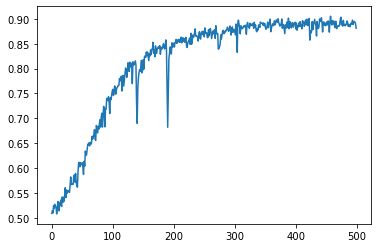

In [29]:
history = model.fit(X_train,Y_train,epochs=500)
plt.plot(history.history["accuracy"])

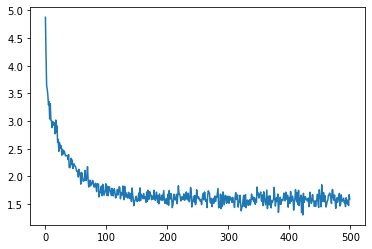

In [30]:
plt.plot(history.history["loss"])

In [30]:
model.evaluate(X_test,Y_test)

16/16 [==============================] - 0s 951us/step - loss: 0.2261 - accuracy: 0.8838


[0.22614538669586182, 0.8837675452232361]

**Make Improvement**

**Feature Engineering**<br>
Intuition tells me that the ratio of **loan/income** is also a key factor deciding whether default will occur. Also, there might exist some **non-linear relationship** between independent variables and the target variable (default).

In [31]:
df.head()

,default,age,income,loan
0,0,59.017015,66155.92510,8106.532131
1,0,48.117153,34415.15397,6564.745018
2,0,63.108049,57317.17006,8020.953296
3,0,45.751972,42709.53420,6103.642260
4,1,18.584336,66952.68885,8770.099235


In [32]:
def nonlinear_design(df):
    X = df.copy()
    # Compute nonlinear transformations for each quantitative feature
    for col in X.columns:
        if col=='default':
            continue
        else:
            X[f'{col}^2'] = X[f'{col}'] ** 2
            X[f'{col}^3'] = X[f'{col}'] ** 3
            X[f'sqrt({col})'] = np.sqrt(X[f'{col}'])
    return X

In [33]:
df_new=nonlinear_design(df)
df_new.head()

,default,age,income,loan,age^2,age^3,sqrt(age),income^2,income^3,sqrt(income),loan^2,loan^3,sqrt(loan)
0,0,59.017015,66155.92510,8106.532131,3483.008068,205556.739625,7.682253,4.376606e+09,2.895384e+14,257.207941,6.571586e+07,5.327278e+11,90.036282
1,0,48.117153,34415.15397,6564.745018,2315.260422,111403.740213,6.936653,1.184403e+09,4.076141e+13,185.513218,4.309588e+07,2.829134e+11,81.023114
2,0,63.108049,57317.17006,8020.953296,3982.625910,251335.753056,7.944057,3.285258e+09,1.883017e+14,239.410046,6.433569e+07,5.160336e+11,89.559775
3,0,45.751972,42709.53420,6103.642260,2093.242974,95769.994664,6.764020,1.824104e+09,7.790665e+13,206.662852,3.725445e+07,2.273878e+11,78.125810
4,1,18.584336,66952.68885,8770.099235,345.377542,6418.612262,4.310955,4.482663e+09,3.001263e+14,258.752177,7.691464e+07,6.745490e+11,93.648808


In [34]:
df_new['ratio']=df_new['loan']/df_new['income']

In [35]:
df_new.head()

,default,age,income,loan,age^2,age^3,sqrt(age),income^2,income^3,sqrt(income),loan^2,loan^3,sqrt(loan),ratio
0,0,59.017015,66155.92510,8106.532131,3483.008068,205556.739625,7.682253,4.376606e+09,2.895384e+14,257.207941,6.571586e+07,5.327278e+11,90.036282,0.122537
1,0,48.117153,34415.15397,6564.745018,2315.260422,111403.740213,6.936653,1.184403e+09,4.076141e+13,185.513218,4.309588e+07,2.829134e+11,81.023114,0.190752
2,0,63.108049,57317.17006,8020.953296,3982.625910,251335.753056,7.944057,3.285258e+09,1.883017e+14,239.410046,6.433569e+07,5.160336e+11,89.559775,0.139940
3,0,45.751972,42709.53420,6103.642260,2093.242974,95769.994664,6.764020,1.824104e+09,7.790665e+13,206.662852,3.725445e+07,2.273878e+11,78.125810,0.142911
4,1,18.584336,66952.68885,8770.099235,345.377542,6418.612262,4.310955,4.482663e+09,3.001263e+14,258.752177,7.691464e+07,6.745490e+11,93.648808,0.130989


In [36]:
X=df_new.drop(columns='default')
Y=df_new['default']
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=1)

In [37]:
from imblearn.over_sampling import SMOTE
X_train,Y_train=SMOTE(random_state=1).fit_resample(X_train,Y_train)

In [38]:
#XGBoost
import xgboost as xgb
model = xgb.XGBClassifier(random_state=1)
model.fit(X_train,Y_train)

prediction_result(model)

[20:26:51] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[1283    0]
 [   0 1283]]
accuracy of train is  1.0
precision of train is  1.0
recall of train is  1.0
[[428   0]
 [  1  70]]
accuracy of test is  0.9979959919839679
precision of test is  1.0
recall of test is  0.9859154929577465


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, 

In [39]:
from autogluon.tabular import TabularDataset,TabularPredictor

In [40]:
rows, cols = df_new.shape
split_index = int(rows * 0.75)
df_train=df_new.iloc[0: split_index, :]
df_test= df_new.iloc[split_index:, :]

In [41]:
X_test=df_test.drop(columns='default')
Y_test=df_test.iloc[:,0]
X_train=df_train.drop(columns='default')
Y_train=df_train.iloc[:,0]

In [42]:
train_data=TabularDataset(df_train)
label='default'
autogluon_predictor=TabularPredictor(label=label).fit(df_train)

No path specified. Models will be saved in: "AutogluonModels/ag-20221015_123144/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20221015_123144/"
AutoGluon Version:  0.5.2
Python Version:     3.8.5
Operating System:   Darwin
Train Data Rows:    1495
Train Data Columns: 13
Label Column: default
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0, 1]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    5682.74 MB
	Train Data (Original)  Memory Usage: 0.16 MB (0.0% of available memory)
	Inferring data type of each feat

In [43]:
prediction_result(autogluon_predictor)

[[1280    0]
 [   0  215]]
accuracy of train is  1.0
precision of train is  1.0
recall of train is  1.0
[[431   0]
 [  1  67]]
accuracy of test is  0.9979959919839679
precision of test is  1.0
recall of test is  0.9852941176470589
